**PREPROCESSING**

**TRANSFERRING IMAGE LOCALLY FROM DRIVE**

In [ ]:
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
from google.colab import drive
from tqdm.notebook import tqdm

# Connect to Drive
drive.mount('/content/drive')

# CONFIGURATION
source_root = "/content/drive/MyDrive/Mapbox_Dataset_Zoom17.5"
dest_root = "/content/dataset"
folders_to_copy = ["train_images", "test_images"]
max_workers = 16  # Copy 16 files at the same time

def copy_file(args):
    src_path, dst_path = args
    try:
        shutil.copy2(src_path, dst_path)
    except Exception as e:
        pass


all_tasks = []

print("Scanning files to build transfer list...")

for folder in folders_to_copy:
    src_folder = os.path.join(source_root, folder)
    dst_folder = os.path.join(dest_root, folder)

    # Creating Local Folder
    os.makedirs(dst_folder, exist_ok=True)

    # Get file list
    if os.path.exists(src_folder):
        files = [f for f in os.listdir(src_folder) if f.endswith('.jpg')]
        print(f"Found {len(files)} images in {folder}")

        # Prepare tasks
        for f in files:
            src = os.path.join(src_folder, f)
            dst = os.path.join(dst_folder, f)
            all_tasks.append((src, dst))

# EXECUTING IN PARALLEL
print(f"\n Starting Parallel Copy ({len(all_tasks)} files)...")

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    list(tqdm(executor.map(copy_file, all_tasks), total=len(all_tasks), unit="img"))


Mounted at /content/drive
Scanning files to build transfer list...
Found 16110 images in train_images
Found 5396 images in test_images

 Starting Parallel Copy (21506 files)...


  0%|          | 0/21506 [00:00<?, ?img/s]

In [ ]:
import os

# Defining the local paths
base_dir = "/content/dataset"
train_dir = os.path.join(base_dir, "train_images")
test_dir = os.path.join(base_dir, "test_images")

# Checking if folders exist
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    print(f" ERROR: Folders not found at {base_dir}")
    print("The copy command didn't finish or didn't run correctly.")
else:
    # Count the files
    # We use a fast list comprehension
    num_train = len([f for f in os.listdir(train_dir) if f.endswith('.jpg')])
    num_test = len([f for f in os.listdir(test_dir) if f.endswith('.jpg')])

    # Printing Report
    print("-" * 30)
    print(f"Train Images Locally: {num_train}")
    print(f"Test Images Locally:  {num_test}")
    print("-" * 30)

    # Status
    if num_train > 1000 and num_test > 1000:
        print(" Data is transferred and ready for training!")
    else:
        print(" Transfer incomplete. Numbers seem too low.")

------------------------------
Train Images Locally: 16110
Test Images Locally:  5396
------------------------------
 Data is transferred and ready for training!


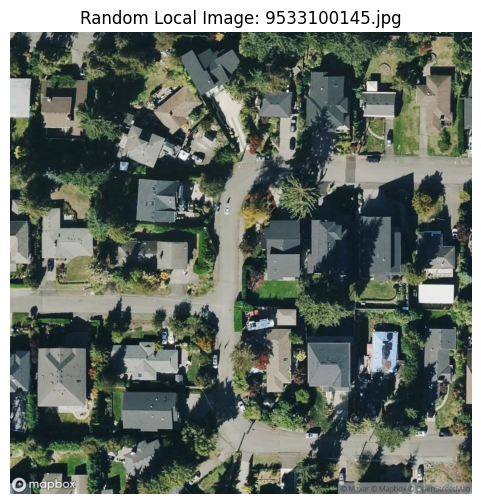

Successfully loaded 9533100145.jpg from local storage!


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define local paths
base_dir = "/content/dataset"
train_dir = os.path.join(base_dir, "train_images")

# Checking if directory exists
if os.path.exists(train_dir):
    # Getting list of all jpg files
    files = [f for f in os.listdir(train_dir) if f.endswith('.jpg')]

    if len(files) > 0:
        # Picking a random file
        random_file = random.choice(files)
        img_path = os.path.join(train_dir, random_file)

        # display
        img = Image.open(img_path)
        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Random Local Image: {random_file}")
        plt.show()

        print(f"Successfully loaded {random_file} from local storage!")
    else:
        print("No images found in the folder yet")
else:
    print(f"Directory {train_dir} does not exist yet.")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")

In [2]:
import pandas as pd
file_path = '/content/train (1).csv'
df = pd.read_csv(file_path)
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [4]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
import pandas as pd
df = pd.read_csv('train (1).csv')

# Pandas automatically handles the "20141013T000000" format
df['date'] = pd.to_datetime(df['date'])

# 3. Creating New Features
df['sales_year'] = df['date'].dt.year
df['sales_month'] = df['date'].dt.month

df['house_age'] = df['sales_year'] - df['yr_built']

df = df.drop(columns=['date'])

# Checking the new columns
print(df[['price', 'sales_year', 'sales_month', 'house_age']].head())

    price  sales_year  sales_month  house_age
0  268643        2015            5         54
1  245000        2014            7         22
2  200000        2015            1         21
3  352499        2015            4          6
4  232000        2014           12         20


In [6]:
df.head()

id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  9117000170  268643         4       2.25         1810      9240     2.0   
1  6700390210  245000         3       2.50         1600      2788     2.0   
2  7212660540  200000         4       2.50         1720      8638     2.0   
3  8562780200  352499         2       2.25         1240       705     2.0   
4  7760400350  232000         3       2.00         1280     13356     1.0   

   waterfront  view  condition  ...  yr_built  yr_renovated  zipcode      lat  \
0           0     0          3  ...      1961             0    98055  47.4362   
1           0     0          4  ...      1992             0    98031  47.4034   
2           0     0          3  ...      1994             0    98003  47.2704   
3           0     0          3  ...      2009             0    98027  47.5321   
4           0     0          3  ...      1994             0    98042  47.3715   

      long  sqft_living15  sqft_lot15  sales_year  sales_month  house_age  
0 -122.187           1660        9240        2015            5         54  
1 -122.187           1720        3605        2014            7         22  
2 -122.313           1870        7455        2015            1         21  
3 -122.073           1240         750        2015            4          6  
4 -122.074           1590        8071        2014           12         20  

[5 rows x 23 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   price          16209 non-null  int64  
 2   bedrooms       16209 non-null  int64  
 3   bathrooms      16209 non-null  float64
 4   sqft_living    16209 non-null  int64  
 5   sqft_lot       16209 non-null  int64  
 6   floors         16209 non-null  float64
 7   waterfront     16209 non-null  int64  
 8   view           16209 non-null  int64  
 9   condition      16209 non-null  int64  
 10  grade          16209 non-null  int64  
 11  sqft_above     16209 non-null  int64  
 12  sqft_basement  16209 non-null  int64  
 13  yr_built       16209 non-null  int64  
 14  yr_renovated   16209 non-null  int64  
 15  zipcode        16209 non-null  int64  
 16  lat            16209 non-null  float64
 17  long           16209 non-null  float64
 18  sqft_l

In [8]:

print(df.columns.tolist())

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age']


we have converted yr_renovated to is_renovated as most of the houses were not renovated

In [9]:
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)


In [ ]:
df.head()

id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  9117000170  268643         4       2.25         1810      9240     2.0   
1  6700390210  245000         3       2.50         1600      2788     2.0   
2  7212660540  200000         4       2.50         1720      8638     2.0   
3  8562780200  352499         2       2.25         1240       705     2.0   
4  7760400350  232000         3       2.00         1280     13356     1.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0           0     0          3  ...             0    98055  47.4362 -122.187   
1           0     0          4  ...             0    98031  47.4034 -122.187   
2           0     0          3  ...             0    98003  47.2704 -122.313   
3           0     0          3  ...             0    98027  47.5321 -122.073   
4           0     0          3  ...             0    98042  47.3715 -122.074   

   sqft_living15  sqft_lot15  sales_year  sales_month  house_age  is_renovated  
0           1660        9240        2015            5         54             0  
1           1720        3605        2014            7         22             0  
2           1870        7455        2015            1         21             0  
3           1240         750        2015            4          6             0  
4           1590        8071        2014           12         20             0  

[5 rows x 24 columns]

In [10]:
df = df.drop(columns=['yr_renovated']) #as most of the houses were not renovated so we already created alternatively
df = df.drop(columns=['long'])
df = df.drop(columns=['lat'])
df = df.drop(columns=['sqft_living']) #as it is sum of two columns

In [11]:
df.head()

id   price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
0  9117000170  268643         4       2.25      9240     2.0           0   
1  6700390210  245000         3       2.50      2788     2.0           0   
2  7212660540  200000         4       2.50      8638     2.0           0   
3  8562780200  352499         2       2.25       705     2.0           0   
4  7760400350  232000         3       2.00     13356     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  zipcode  \
0     0          3      7        1810              0      1961    98055   
1     0          4      7        1600              0      1992    98031   
2     0          3      8        1720              0      1994    98003   
3     0          3      7        1150             90      2009    98027   
4     0          3      7        1280              0      1994    98042   

   sqft_living15  sqft_lot15  sales_year  sales_month  house_age  is_renovated  
0           1660        9240        2015            5         54             0  
1           1720        3605        2014            7         22             0  
2           1870        7455        2015            1         21             0  
3           1240         750        2015            4          6             0  
4           1590        8071        2014           12         20             0

In [12]:
print(df.columns.tolist())

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age', 'is_renovated']


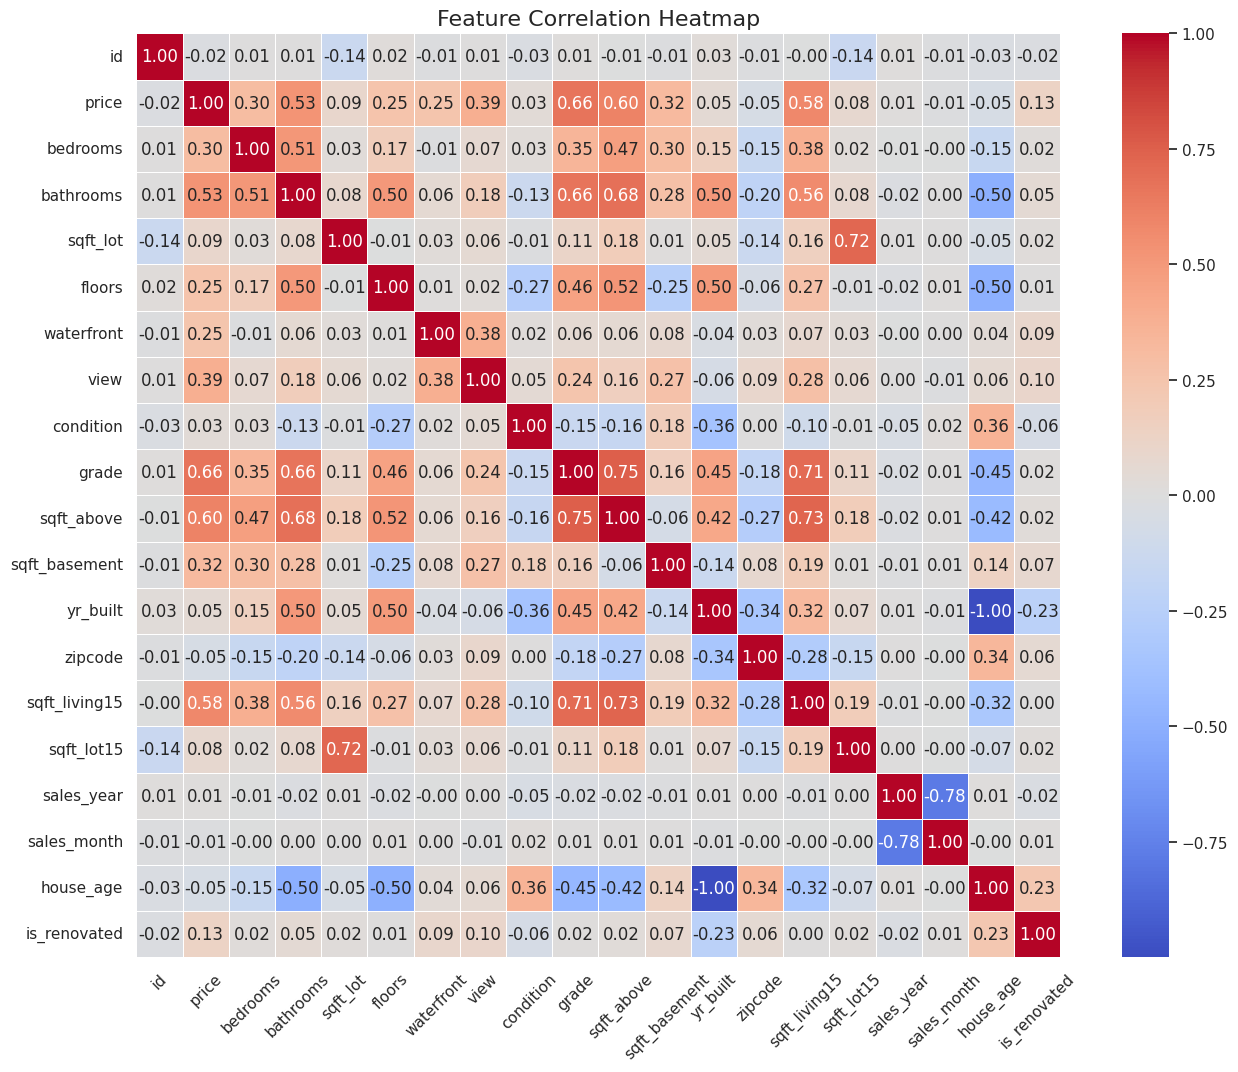

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            square=True)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45) # Rotates labels so they don't overlap
plt.show()

$$\text{House Age} = \text{Year Sold} - \text{Year Built}$$
This creates a perfect linear dependency (multicollinearity)
   so dropping yr_built

In [14]:
df = df.drop(columns=['yr_built'])

In [15]:
print(df.columns.tolist())

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age', 'is_renovated']


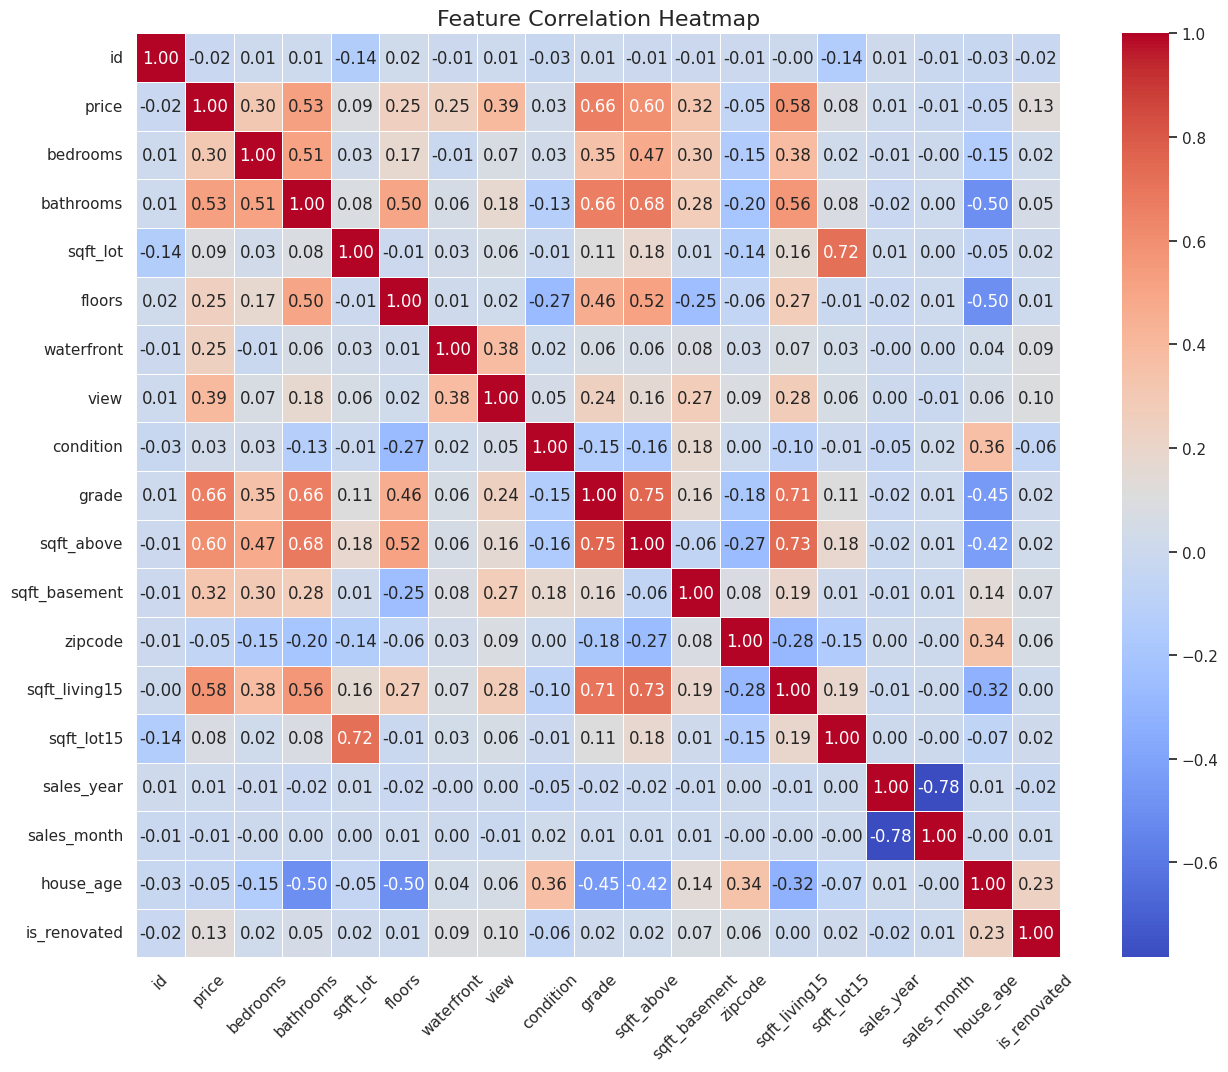

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            square=True)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45) # Rotates labels so they don't overlap
plt.show()

In [18]:
import pandas as pd


print(f"Original Shape: {df.shape}")

#  MODIFY ZIPCODE (One-Hot Encoding)
if 'zipcode' in df.columns:
    df = pd.get_dummies(df, columns=['zipcode'], prefix='zip', drop_first=True, dtype=int)
    print(f"New Shape: {df.shape}")
    print("New Zipcode Columns created:")
    # Printing just the first 5 new zip columns to check
    zip_cols = [col for col in df.columns if 'zip_' in col]
    print(df[zip_cols].head())
else:
    print("The 'zipcode' column has already been processed.")

Original Shape: (16209, 19)
New Shape: (16209, 87)
New Zipcode Columns created:
   zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          1          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   zip_98008  zip_98010  zip_98011  zip_98014  ...  zip_98146  zip_98148  \
0          0          0          0          0  ...          0          0   
1          0          0          0          0  ...          0          0   
2          0          0          0          0  ...          0          0   
3          0          0          0          0  ...          0          0   
4          0          0          0          0  ...          0          0   

   zip_98155  zip_98166  zip_98168  

In [19]:
df.head()

id   price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
0  9117000170  268643         4       2.25      9240     2.0           0   
1  6700390210  245000         3       2.50      2788     2.0           0   
2  7212660540  200000         4       2.50      8638     2.0           0   
3  8562780200  352499         2       2.25       705     2.0           0   
4  7760400350  232000         3       2.00     13356     1.0           0   

   view  condition  grade  ...  zip_98146  zip_98148  zip_98155  zip_98166  \
0     0          3      7  ...          0          0          0          0   
1     0          4      7  ...          0          0          0          0   
2     0          3      8  ...          0          0          0          0   
3     0          3      7  ...          0          0          0          0   
4     0          3      7  ...          0          0          0          0   

   zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  
0          0          0          0          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 87 columns]

In [20]:
print(df.columns.tolist())

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age', 'is_renovated', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_9

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#  Selecting the features
features_to_scale = [
    'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement',
     'sqft_living15', 'sqft_lot15',
    'view', 'condition', 'grade','sales_year', 'sales_month', 'house_age'
]

# Scaling the features in the DataFrame
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df['price_log'] = np.log1p(df['price'])

print("DataFrame normalized in memory.")

DataFrame normalized in memory.


In [22]:
df.head()

id   price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
0  9117000170  268643  0.121212    0.28125  0.007490     0.4           0   
1  6700390210  245000  0.090909    0.31250  0.001948     0.4           0   
2  7212660540  200000  0.121212    0.31250  0.006973     0.4           0   
3  8562780200  352499  0.060606    0.28125  0.000159     0.4           0   
4  7760400350  232000  0.090909    0.25000  0.011025     0.0           0   

   view  condition     grade  ...  zip_98148  zip_98155  zip_98166  zip_98168  \
0   0.0       0.50  0.500000  ...          0          0          0          0   
1   0.0       0.75  0.500000  ...          0          0          0          0   
2   0.0       0.50  0.583333  ...          0          0          0          0   
3   0.0       0.50  0.500000  ...          0          0          0          0   
4   0.0       0.50  0.500000  ...          0          0          0          0   

   zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  price_log  
0          0          0          0          0          0  12.501142  
1          0          0          0          0          0  12.409018  
2          0          0          0          0          0  12.206078  
3          0          0          0          0          0  12.772806  
4          0          0          0          0          0  12.354497  

[5 rows x 88 columns]

In [23]:
print(df.columns.tolist())

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age', 'is_renovated', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_9

In [24]:
df.shape

(16209, 88)

In [25]:
# Automatically grab all features except ID and Targets
exclude = ['id', 'price', 'price_log']
features_list = [col for col in df.columns if col not in exclude]

print(f"model is ready to train on {len(features_list)} tabular features.")

from sklearn.model_selection import train_test_split

# Spliting the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

model is ready to train on 85 tabular features.


 Saved 'price_dist_plot.png'


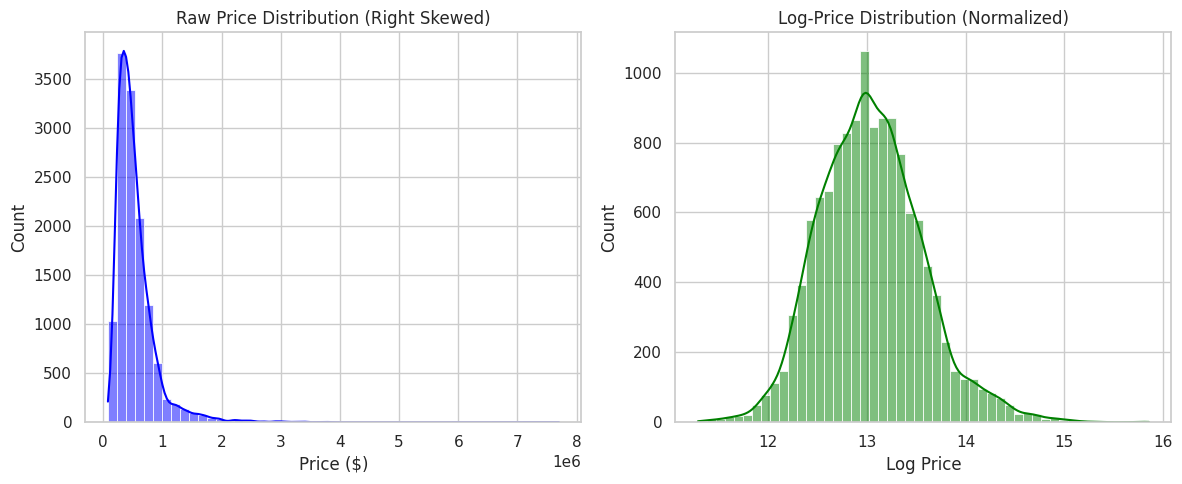

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 5))

#  Raw Price Distribution (Right Skewed)
plt.subplot(1, 2, 1)
sns.histplot(train_df['price'], bins=50, kde=True, color='blue')
plt.title('Raw Price Distribution (Right Skewed)')
plt.xlabel('Price ($)')

#  Log Price Distribution (Normal)
plt.subplot(1, 2, 2)
# We use the log price we created earlier
sns.histplot(train_df['price_log'], bins=50, kde=True, color='green')
plt.title('Log-Price Distribution (Normalized)')
plt.xlabel('Log Price')

plt.tight_layout()

plt.savefig('price_dist_plot.png', dpi=300)
print(" Saved 'price_dist_plot.png'")

MULTIMODAL DATA GENERATOR** Generates data for Keras for a multi-modal model (images + tabular data)**

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

class MultiModalDataGenerator(tf.keras.utils.Sequence):
    """Generates data for Keras for a multi-modal model (images + tabular data)"""

    def __init__(self, df, features, img_dir, batch_size=32, img_size=(224, 224), target_col='price_log', shuffle=True):
        self.df = df.copy()
        self.features = features
        self.img_dir = img_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.target_col = target_col
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch"""
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        """Generate one batch of data"""
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        batch_df = self.df.iloc[indexes]

        # Generate data
        X, y = self.__data_generation(batch_df)
        return X, y

    def on_epoch_end(self):
        """Updates indexes after each epoch"""
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _load_image(self, img_id):
        """Loads and preprocesses an image"""
        # Convert img_id to an integer before creating the path
        img_path = os.path.join(self.img_dir, f"{int(img_id)}.jpg")
        img = Image.open(img_path).resize(self.img_size)
        img = np.array(img) / 255.0  # Normalize to [0, 1]
        return img

    def __data_generation(self, batch_df):
        """Generates data containing batch_size samples"""
        # X : (n_samples, *dim, n_channels) (images) and (n_samples, n_features) (tabular)
        # y : (n_samples, ) (labels)

        images = np.empty((self.batch_size, *self.img_size, 3))
        tabular_data = np.empty((self.batch_size, len(self.features)))
        labels = np.empty((self.batch_size), dtype=float)

        # Generate data
        for i, (idx, row) in enumerate(batch_df.iterrows()):
            # Store sample
            images[i,] = self._load_image(row['id'])
            tabular_data[i,] = row[self.features].values
            labels[i] = row[self.target_col]

        return {'image_input': images, 'tabular_input': tabular_data}, labels

In [ ]:

local_path = "/content/dataset/train_images"

train_generator = MultiModalDataGenerator(
    df=train_df,
    features=features_list,
    img_dir=local_path,
    batch_size=32
)

val_generator = MultiModalDataGenerator(
    df=val_df,
    features=features_list,
    img_dir=local_path,
    batch_size=32,
    shuffle=False
)

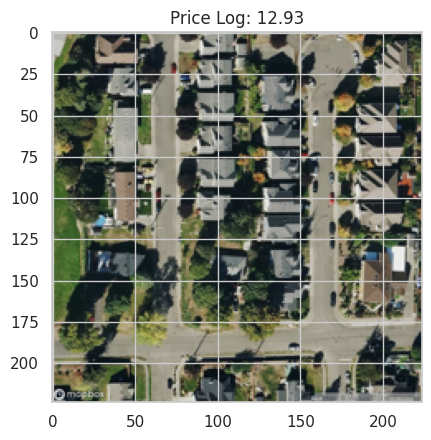

Tabular features shape: (32, 85)


In [ ]:
import cv2
import matplotlib.pyplot as plt

inputs, labels = train_generator[0]

plt.imshow(inputs['image_input'][0])
plt.title(f"Price Log: {labels[0]:.2f}")
plt.show()

print(f"Tabular features shape: {inputs['tabular_input'].shape}") # Should be (32, 85)

With Mean Bias: The model starts its very first guess at the average price (e.g., $13.5$). The error is tiny, so the model can immediately start learning the differences between houses (like which zipcodes or images make a house more expensive than average).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# CALCULATING INITIAL BIAS
# Uses the average log price so the model doesn't start from zero
initial_bias = train_df['price_log'].mean()
print(f"Initial Bias: {initial_bias:.4f}")

# DEFINING ARCHITECTURE
# BRANCH A: IMAGES
img_input = layers.Input(shape=(224, 224, 3), name="image_input")
x = layers.Conv2D(32, (3, 3), activation='relu')(img_input)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x) # Faster and prevents overfitting
x = layers.Dense(128, activation='relu')(x)

# BRANCH B: TABULAR (85 Features)
tab_input = layers.Input(shape=(len(features_list),), name="tabular_input")
y = layers.Dense(128, activation='relu')(tab_input)
y = layers.Dropout(0.3)(y)
y = layers.Dense(64, activation='relu')(y)

# CONCATENATION & OUTPUT
combined = layers.concatenate([x, y])
z = layers.Dense(64, activation='relu')(combined)

# Apply bias initialization here
output = layers.Dense(
    1,
    name="price_output",
    bias_initializer=tf.keras.initializers.Constant(initial_bias)
)(z)

model = models.Model(inputs=[img_input, tab_input], outputs=output)

# COMPILE
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)

model.summary()

Initial Bias: 13.0440


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 85)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     11,008 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv2d_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      8,320 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │     12,352 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price_output        │ (None, 1)         │         65 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 59,393 (232.00 KB)

 Trainable params: 59,393 (232.00 KB)

 Non-trainable params: 0 (0.00 B)

--- [STEP 1] TABULAR FEATURE VERIFICATION ---
Total features being sent to model: 85
Sample of features: ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age'] ... and more.

--- [STEP 2] BATCH DATA DIMENSIONS ---
Images in batch: (32, 224, 224, 3) (Batch Size, Height, Width, Channels)
Tabular data in batch: (32, 85) (Batch Size, Number of Features)
Labels in batch: (32,) (Log Prices)

--- [STEP 3] NORMALIZATION CHECK ---
Pixels range: 0.00 to 1.00 (Should be 0.0 to 1.0)
Tabular range: 0.00 to 1.00 (Should be 0.0 to 1.0)

--- [STEP 4] VISUAL INSPECTION ---


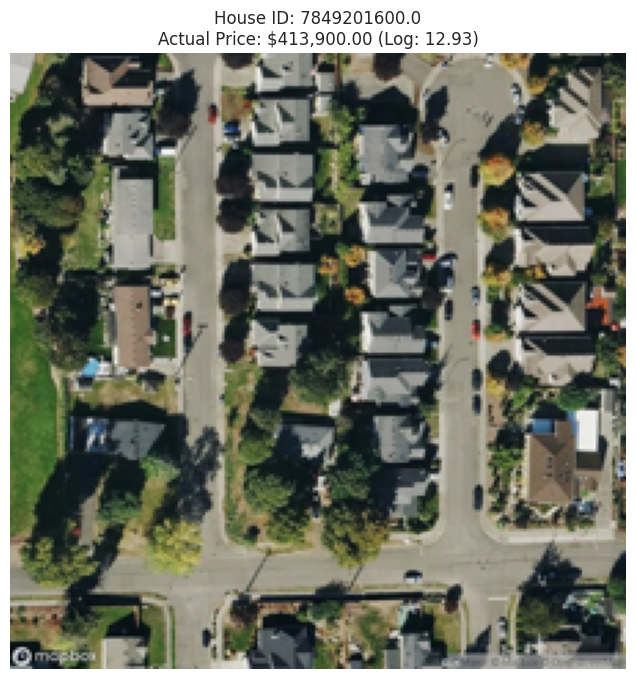


Tabular data for this house (first 10 features):
bedrooms: 0.1212
bathrooms: 0.2812
sqft_lot: 0.0041
floors: 0.4000
waterfront: 0.0000
view: 0.0000
condition: 0.5000
grade: 0.5000
sqft_above: 0.1727
sqft_basement: 0.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  Verifying the Feature List
print("--- [STEP 1] TABULAR FEATURE VERIFICATION ---")
print(f"Total features being sent to model: {len(features_list)}")
print(f"Sample of features: {features_list[:15]} ... and more.")

# Pulling exactly one batch from the generator
# This mimics one step of the training process
inputs, labels = train_generator[0]

batch_images = inputs['image_input']
batch_tabular = inputs['tabular_input']

print("\n--- [STEP 2] BATCH DATA DIMENSIONS ---")
print(f"Images in batch: {batch_images.shape} (Batch Size, Height, Width, Channels)")
print(f"Tabular data in batch: {batch_tabular.shape} (Batch Size, Number of Features)")
print(f"Labels in batch: {labels.shape} (Log Prices)")

# 3. Value Range Checks (Crucial for Neural Networks)
print("\n--- [STEP 3] NORMALIZATION CHECK ---")
print(f"Pixels range: {batch_images.min():.2f} to {batch_images.max():.2f} (Should be 0.0 to 1.0)")
print(f"Tabular range: {batch_tabular.min():.2f} to {batch_tabular.max():.2f} (Should be 0.0 to 1.0)")

# 4. Visual & Tabular Sync Check
print("\n--- [STEP 4] VISUAL INSPECTION ---")
# Picking the first house in the batch
idx = 0
sample_log_price = labels[idx]
actual_price = np.expm1(sample_log_price) # Converting back to dollars

plt.figure(figsize=(8, 8))
plt.imshow(batch_images[idx])
plt.title(f"House ID: {train_df.iloc[idx]['id']}\nActual Price: ${actual_price:,.2f} (Log: {sample_log_price:.2f})")
plt.axis('off')
plt.show()

print(f"\nTabular data for this house (first 10 features):")
# Showing the values for the first 10 features of this specific house
for i in range(10):
    print(f"{features_list[i]}: {batch_tabular[idx][i]:.4f}")

**MOADL TRAINING**


In [ ]:
# Callbacks to manage the training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint('/content/best_model.keras', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3) # Automatically lowers LR if learning stalls
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - loss: 0.1636 - mae: 0.3066

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


405/405 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - loss: 0.1635 - mae: 0.3064 - val_loss: 0.0486 - val_mae: 0.1633 - learning_rate: 5.0000e-04
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 433s 1s/step - loss: 0.0626 - mae: 0.1911 - val_loss: 0.0515 - val_mae: 0.1742 - learning_rate: 5.0000e-04
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - loss: 0.0527 - mae: 0.1753 - val_loss: 0.0405 - val_mae: 0.1480 - learning_rate: 5.0000e-04
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - loss: 0.0499 - mae: 0.1681 - val_loss: 0.0423 - val_mae: 0.1549 - learning_rate: 5.0000e-04
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - loss: 0.0466 - mae: 0.1619 - val_loss: 0.0371 - val_mae: 0.1422 - learning_rate: 5.0000e-04
Epoch 6/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - loss: 0.0439 - mae: 0.1568 - val_loss: 0.0367 - val_mae: 0.1407 - learning_rate: 5.0000e-04
Epoch 7/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - loss: 0.0400 - mae: 0.1496 - val_loss: 0.0497 - val_mae: 0.1765 - learning

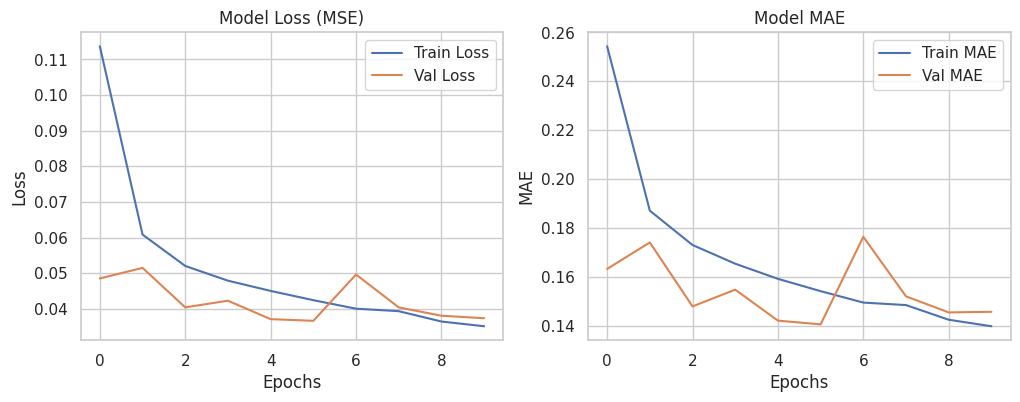

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Loss (MSE)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss (MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title('Model MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_history(history)

101/101 ━━━━━━━━━━━━━━━━━━━━ 83s 795ms/step
 Final Validation R2 Score: 0.8670


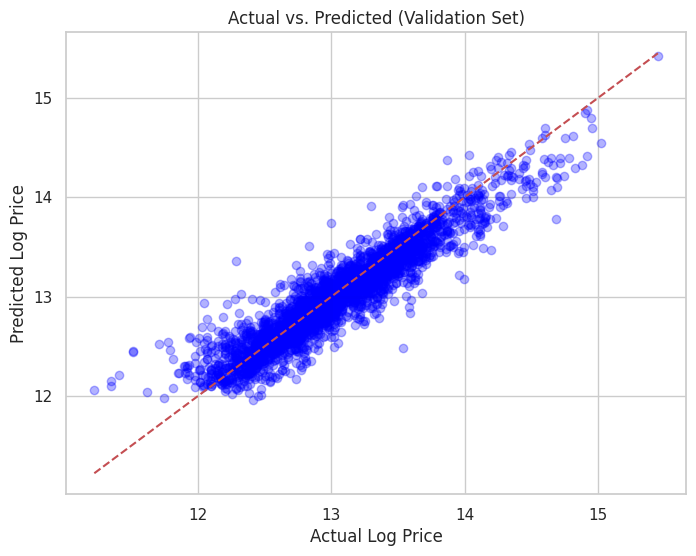

In [ ]:
from sklearn.metrics import r2_score

#Getting predictions for validation set
val_preds_log = model.predict(val_generator)

# Ensure val_actual_log matches the length of val_preds_log
# The generator might drop the last partial batch.
val_actual_log = val_df['price_log'].iloc[:len(val_preds_log)]

r2 = r2_score(val_actual_log, val_preds_log)
print(f" Final Validation R2 Score: {r2:.4f}")

# (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(val_actual_log, val_preds_log, alpha=0.3, color='blue')
plt.plot([val_actual_log.min(), val_actual_log.max()], [val_actual_log.min(), val_actual_log.max()], 'r--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs. Predicted (Validation Set)')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

print("Predicting prices for the training set...")
# Getting predictions for the training set (in Log scale)
train_preds_log = model.predict(train_generator)

# Convert actual and predicted log prices back to dollar scale
# Slice actual_train_dollars to match the length of train_preds_log
actual_train_dollars = np.expm1(train_df['price_log'].values[:len(train_preds_log)])
predicted_train_dollars = np.expm1(train_preds_log.flatten())

# Calculating MAE on the dollar scale
mae_dollars = mean_absolute_error(actual_train_dollars, predicted_train_dollars)

print(f"\nTraining MAE (in Dollars): ${mae_dollars:,.2f}")

Predicting prices for the training set...
405/405 ━━━━━━━━━━━━━━━━━━━━ 334s 820ms/step

Training MAE (in Dollars): $304,741.73


Predicting prices for all records...
101/101 ━━━━━━━━━━━━━━━━━━━━ 83s 817ms/step

 FINAL TEST R2 SCORE (IN DOLLARS): 0.8540


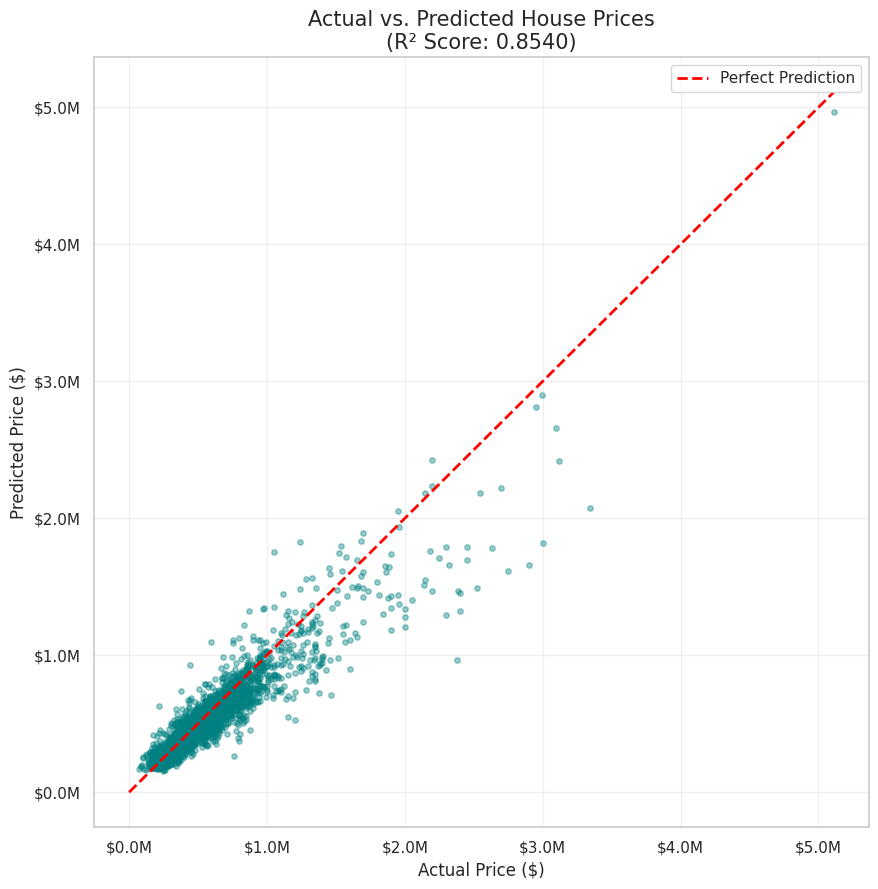


First 10 predictions in Real Dollars:
   Actual_Price  Predicted_Price       Error_$
0      612000.0     5.706520e+05   41348.00000
1      392000.0     3.247646e+05   67235.43750
2      399888.0     3.384582e+05   61429.84375
3      385000.0     4.426686e+05  -57668.56250
4      235000.0     2.821624e+05  -47162.37500
5      390000.0     3.922697e+05   -2269.65625
6      485000.0     5.039199e+05  -18919.93750
7     1695000.0     1.246266e+06  448733.50000
8      650000.0     6.369200e+05   13080.00000
9      275000.0     2.821008e+05   -7100.75000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Getting predictions for the ENTIRE validation set
print("Predicting prices for all records...")
val_preds_log = model.predict(val_generator)

#  Invert the Log for both Actuals and Predictions
# Slice all_actual_dollars to match the length of val_preds_log
all_actual_dollars = np.expm1(val_df['price_log'].iloc[:len(val_preds_log)].values)
all_predicted_dollars = np.expm1(val_preds_log.flatten())

# Calculate R2 Score on REAL PRICES
r2_real = r2_score(all_actual_dollars, all_predicted_dollars)
print(f"\n FINAL TEST R2 SCORE (IN DOLLARS): {r2_real:.4f}")

# Creating the "Real Price" Comparison Plot
plt.figure(figsize=(10, 10))

# Scatter plot
plt.scatter(all_actual_dollars, all_predicted_dollars, alpha=0.4, color='teal', s=15)

# Adding the "Perfect Prediction" line
max_val = max(all_actual_dollars.max(), all_predicted_dollars.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Formatting to handle the large dollar amounts
plt.title(f'Actual vs. Predicted House Prices\n(R² Score: {r2_real:.4f})', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)

plt.ticklabel_format(style='plain', axis='both')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

plt.grid(alpha=0.3)
plt.legend()
plt.show()

#  Showing a sample of the final results table
results_check = pd.DataFrame({
    'Actual_Price': all_actual_dollars,
    'Predicted_Price': all_predicted_dollars,
    'Error_$': all_actual_dollars - all_predicted_dollars
})
print("\nFirst 10 predictions in Real Dollars:")
print(results_check.head(10))

In [ ]:
# Create a specific generator for evaluation (shuffling turned OFF)
eval_train_generator = MultiModalDataGenerator(
    df=train_df,
    features=features_list,
    img_dir=local_path,
    batch_size=32,
    shuffle=False # This ensures House #1's image matches House #1's price
)

# Now predict and calculate R2
train_preds_log = model.predict(eval_train_generator)
train_actual_dollars = np.expm1(train_df['price_log'].iloc[:len(train_preds_log)].values)
train_predicted_dollars = np.expm1(train_preds_log.flatten())

print(f"Fixed Training R2 Score: {r2_score(train_actual_dollars, train_predicted_dollars):.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


405/405 ━━━━━━━━━━━━━━━━━━━━ 327s 806ms/step
Fixed Training R2 Score: 0.8764


In [ ]:
# Saving the final trained model
model.save('multimodal_property_model.keras')
print(" Model saved as multimodal_property_model.keras")
from google.colab import files
files.download('multimodal_property_model.keras')

 Model saved as multimodal_property_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MAKING PREDICTONS**

In [ ]:
import joblib

# Save the scaler you used for the 85 features
joblib.dump(scaler, 'property_scaler.pkl')

print(" Scaler saved as property_scaler.pkl")
files.download('property_scaler.pkl')

 Scaler saved as property_scaler.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np

#  Loading the raw test data
test_df_raw = pd.read_csv('test (2).csv')

# Replicating Feature Engineering (Must match training)
test_df_raw['sales_year'] = pd.to_datetime(test_df_raw['date']).dt.year
test_df_raw['sales_month'] = pd.to_datetime(test_df_raw['date']).dt.month
test_df_raw['house_age'] = test_df_raw['sales_year'] - test_df_raw['yr_built']
test_df_raw['is_renovated'] = (test_df_raw['yr_renovated'] > 0).astype(int)

# Handling Zipcodes (One-Hot Encoding)
test_df_processed = pd.get_dummies(test_df_raw, columns=['zipcode'], prefix='zip')

# Aligning Columns
# This ensures the test set has all the same zip columns as the training set
for col in features_list:
    if col not in test_df_processed.columns:
        test_df_processed[col] = 0

# Scaling the numerical features
# We use the 'scaler' object that was fit on your training data
test_df_processed[features_to_scale] = scaler.transform(test_df_processed[features_to_scale])

print(f" Test data processed. Shape: {test_df_processed.shape}")

 Test data processed. Shape: (5404, 93)


In [ ]:
test_df_processed = test_df_processed.drop(columns=['yr_built'])
test_df_processed = test_df_processed.drop(columns=['date'])
test_df_processed = test_df_processed.drop(columns=['sqft_living'])
test_df_processed = test_df_processed.drop(columns=['lat'])
test_df_processed = test_df_processed.drop(columns=['long'])
test_df_processed = test_df_processed.drop(columns=['yr_renovated'])

In [ ]:
print(test_df_processed.columns.tolist())

['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age', 'is_renovated', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'z

In [ ]:
test_df_processed.shape

(5404, 87)

In [ ]:
# Creating the generator for the test set
test_generator = MultiModalDataGenerator(
    df=test_df_processed,
    features=features_list,
    img_dir="/content/dataset/test_images",
    batch_size=4,
    shuffle=False,
    target_col='id'     # Using 'id' as a placeholder since we don't have prices
)

print(f" Test generator ready with {len(test_df_processed)} samples.")

 Test generator ready with 5404 samples.


In [ ]:
# Getting predictions (in Log scale)
test_preds_log = model.predict(test_generator)

#  Converting back to real dollars (np.expm1)
final_prices = np.expm1(test_preds_log)

# Creating the final CSV
# Slice test_df_raw['id'] to match the length of final_prices
submission = pd.DataFrame({
    'id': test_df_raw['id'].iloc[:len(final_prices)],
    'predicted_price': final_prices.flatten()
})

# Saving and Download
submission.to_csv('final_predictions.csv', index=False)

from google.colab import files
files.download('final_predictions.csv')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1351/1351 ━━━━━━━━━━━━━━━━━━━━ 156s 114ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- VISUAL INSIGHT: HIGH VALUE PROPERTIES ---


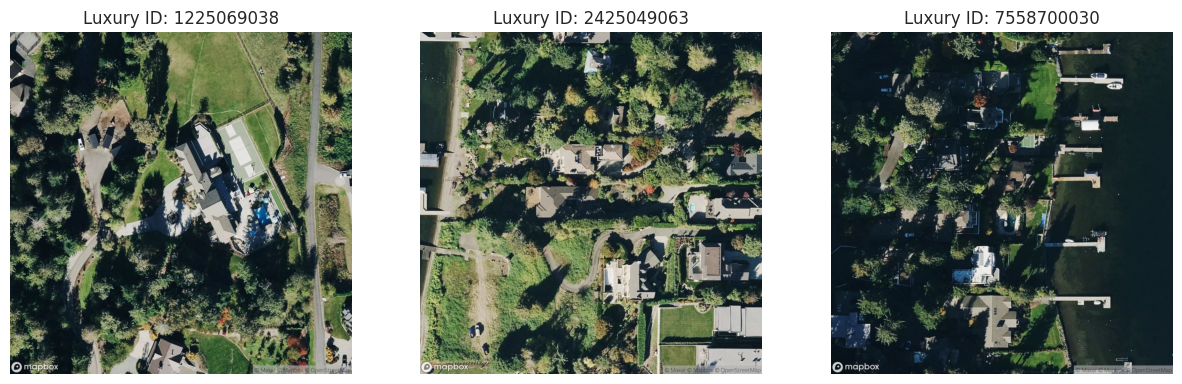

--- VISUAL INSIGHT: LOW VALUE PROPERTIES ---


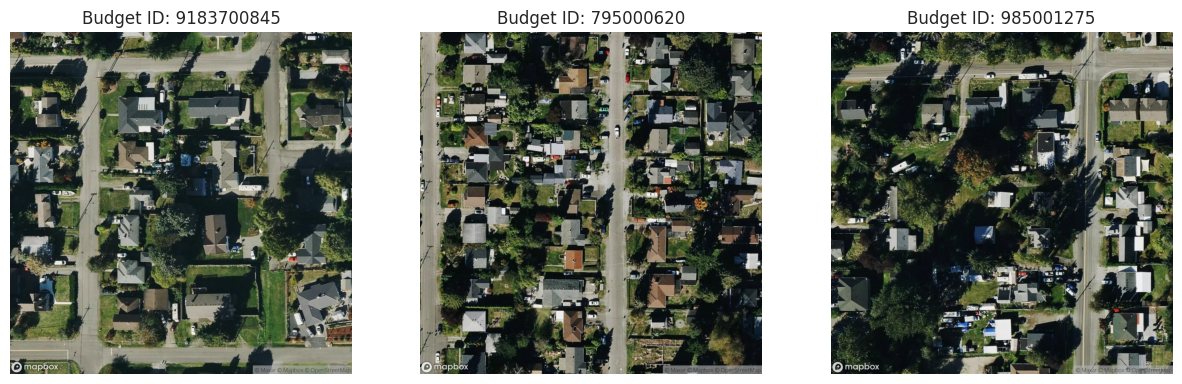

In [ ]:
# Getting the top 3 and bottom 3 predictions
top_3 = submission.sort_values('predicted_price', ascending=False).head(3)
bottom_3 = submission.sort_values('predicted_price', ascending=True).head(3)

def show_insight_images(ids, title):
    plt.figure(figsize=(15, 5))
    for i, img_id in enumerate(ids):
        img = cv2.imread(f"/content/dataset/test_images/{int(img_id)}.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(f"{title} ID: {int(img_id)}")
        plt.axis('off')
    plt.show()

print("--- VISUAL INSIGHT: HIGH VALUE PROPERTIES ---")
show_insight_images(top_3['id'], "Luxury")

print("--- VISUAL INSIGHT: LOW VALUE PROPERTIES ---")
show_insight_images(bottom_3['id'], "Budget")